# Exercise Session 7 – Multi Regional Input Output (MRIO) Analysis
### ENV–501 Material and Energy Flow Analysis

November 3rd, 2022

Exercises developed for Jupyter Notebook by Matteo Barsanti



### Ex. 1 - Economy wide MFA with EXIOBASE 3 and pymrio 

EXIOBASE is a global, detailed Multi-Regional Environmentally Extended Supply-Use Table (MR-SUT) and Input-Output Table (MR-IOT). It was developed by harmonizing and detailing supply-use tables for a large number of countries, estimating emissions and resource extractions by industry. Subsequently the country supply-use tables were linked via trade creating an MR-SUT and producing a MR-IOTs from this. The MR-IOT that can be used for the analysis of the environmental impacts associated with the final consumption of product groups.

1. Compute the EW-MFA for Switzerland for the year 2019 based on the sum of Domestic extraction used and unused. 
2. Compare your results with the EW-MFA from [OFS](https://www.bfs.admin.ch/bfs/fr/home/statistiques/espace-environnement/comptabilite-environnementale/flux-matieres.html) (see Tab. 1). How would you explain the differences?
3. Calculate the EW-MFA for Western Switzerland, updating the system by downscaling the final demand based on population. How would you explain the results?

<br/>

|Flux de matières en Suisse                            | 2019   |
| ---                                                  | :-:    |  
|Extraction intérieure utilisée (DE), mio. tonnes      | 59.8   |	 
|Extraction intérieure non-utilisée (UDE), mio. tonnes*| 62.3   |   
|Importations, mio. tonnes	                           | 52.5   | 
|Exportations, mio. tonnes                             | 17.5   |	
|Emissions dans la nature (DPO), mio. tonnes           | 55.7   |	
|Eléments d'équilibrage, côté input, mio. tonnes       | 59.0   |	
|Eléments d'équilibrage, côté output, mio. tonnes      | 35.1   |	


<br/>

<center> Table 1: Flux de matières en Suisse. </center>

\* Depuis l’actualisation des données en 2019 et afin de s’aligner sur les standards internationaux, les quantités de déchets mis en décharge ont été exclues des émissions dans la nature. Les décharges sont ainsi considérées comme faisant partie des infrastructures de la société.


<ins>Requirements:</ins>
* Download the dataset EXIOBASE 3 for 2019 https://zenodo.org/record/4588235#.YYKIOm3MKUk
* Install the Python library pymrio https://pypi.org/project/pymrio/

<ins>Acronyms:</ins>
* IxI: industry by industry 
* PxP: product by product 

### Economy-wide MFA 

- DMI = DE + Importations
- DMC = DE + Importations - Exportations
- NAS = DE + Importations + Eléments d'équilibrage, côté input - Exportations - DPO - Eléments d'équilibrage, côté output
- PTB = Importations - Exportations

<center><img src="EWMFA_scheme.png" width="400"/></center>

### MRIOA

Based on the linear economy assumption of the IO model and the classic Leontief demand-style modeling, total industry output $X$ can be calculated for any arbitrary vector of final demand $Y$ by multiplying with the total requirement matrix (Leontief matrix) $L$.

$X = (1-A)^{-1}Y = LY$

Where, the direct requirement matrix A is given by multiplication of $Z$ with the diagonalised and inverted industry output $X$:

$A = ZX^{-1}$ 





<center><img src="MRIOA.png" width="700"/></center>

<br/>

The sum of colums minus diagonal matrix, is equal to imports (green cells). While, the sum of rows minus diagonal matrix, is equal to exports (blue cells).

<br/>

<center><img src="Amatrix_scheme.png" width="400"/></center>

The global multi regional IO system can be extended with various factors of production, such as value added, employment and social factors per country, each of them representing a row vector of the factor profuction matrix $F$. Hence, it is possible to derive the factor of production coefficients $S$ as:


$S = FX^{-1}$ 

Multipliers (total, direct and indirect, requirement factors for one unit of output) are then obtained by

$M=SL$

Hence, the total material requirements for any given final demand vector $Y$ are given by

$D_{cba}=MY$

Setting the domestically satisfied final demand $Y_{i,i}$ to zero $(Y_t=Y−Y_i,j|i=j)$ allows to calculate the factor of production occurring abroad (embodied in imports)

$D_{imp}=SLY_t$

The factors of production occurring domestically to satisfy final demand in other countries is given by:

$D_{exp}=SLY_te$

with the hat indicating diagonalization of the resulting column-vector of the term underneath.


### Exercise procedure

#### 0. Test if pymrio works correctly

In [1]:
# -- Import the required libraries 

import pymrio 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# -- Check if pymrio works correctly

# load the test
test_mrio = pymrio.load_test()

# the test mrio consists of six regions and eight sectors:
print(test_mrio.get_sectors())
print(test_mrio.get_regions())

Index(['food', 'mining', 'manufactoring', 'electricity', 'construction',
       'trade', 'transport', 'other'],
      dtype='object', name='sector')
Index(['reg1', 'reg2', 'reg3', 'reg4', 'reg5', 'reg6'], dtype='object', name='region')


In [3]:
# -- Import the data (it takes 2/3 minutes)

exio3 = pymrio.parse_exiobase3(path=r'IOT_2019_ixi.zip')
#exio3 = pymrio.parse_exiobase3(path=r'IOT_2020_ixi.zip')

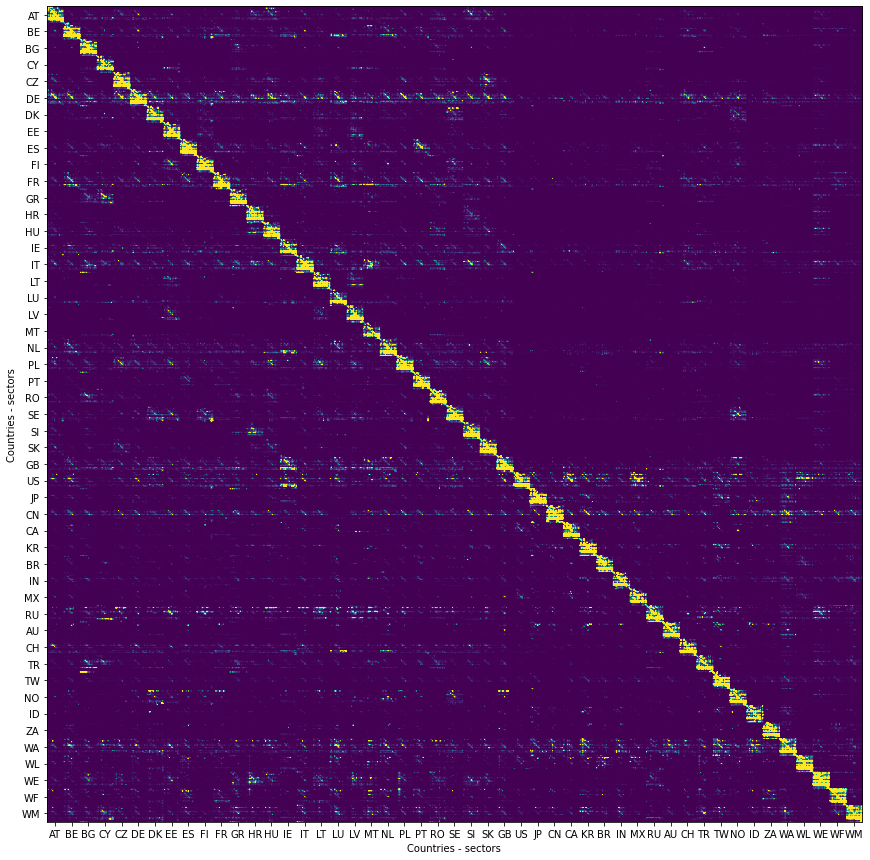

In [4]:
# -- Direct requirement matrix or matrix of coefficients - A

fig = plt.figure(figsize=(15,15))
plt.imshow(exio3.A, vmax=1E-3)

regions = exio3.get_regions()
n_regions = len(regions)
n_sectors = len(exio3.get_sectors())

plt.xticks(range(int(n_sectors/2),n_regions*n_sectors,n_sectors), regions)
plt.yticks(range(int(n_sectors/2),n_regions*n_sectors,n_sectors), regions)

plt.xlabel('Countries - sectors')
plt.ylabel('Countries - sectors')
plt.show()

In [5]:
# -- Show all the exiobase3 object attributes

print(dir(exio3))
# print(dir(exio3.res_diag))

['A', 'IOT_2019_ixi', 'L', 'Y', 'Z', '__basic__', '__class__', '__coefficients__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__non_agg_attributes__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'aggregate', 'calc_all', 'calc_extensions', 'calc_system', 'copy', 'get_DataFrame', 'get_Y_categories', 'get_extensions', 'get_index', 'get_regions', 'get_sectors', 'impacts', 'meta', 'name', 'population', 'remove_extension', 'rename_Y_categories', 'rename_regions', 'rename_sectors', 'report_accounts', 'reset_all_full', 'reset_all_to_coefficients', 'reset_all_to_flows', 'reset_full', 'reset_to_coefficients', 'reset_to_flows', 'satellite', 'save', 'save_all', 'set_index', 'unit', 'x']


In [6]:
# -- Access EXIOBASE3 metadata and attributes

# exio3.meta
# to check for sectors, regions and extensions:
# exio3.get_sectors()
# list of all regions available
# exio3.get_regions()
# exio3.A
# exio3.L
# exio3.Y

#### 1. Select your stressor and calculate the vector of resources/impact

In [7]:
# -- Show the available the satellite accounts/ stressors
groups = exio3.satellite.get_index()
for f in groups:
    print(f)

Taxes less subsidies on products purchased: Total
Other net taxes on production
Compensation of employees; wages, salaries, & employers' social contributions: Low-skilled
Compensation of employees; wages, salaries, & employers' social contributions: Medium-skilled
Compensation of employees; wages, salaries, & employers' social contributions: High-skilled
Operating surplus: Consumption of fixed capital
Operating surplus: Rents on land
Operating surplus: Royalties on resources
Operating surplus: Remaining net operating surplus
Employment: Low-skilled male
Employment: Low-skilled female
Employment: Medium-skilled male
Employment: Medium-skilled female
Employment: High-skilled male
Employment: High-skilled female
Employment hours: Low-skilled male
Employment hours: Low-skilled female
Employment hours: Medium-skilled male
Employment hours: Medium-skilled female
Employment hours: High-skilled male
Employment hours: High-skilled female
Employment: Vulnerable employment
Employment hours: Vulne

To aggregate these with the Pandas groupby function, we need to specify the groups which should be grouped by Pandas. Pymrio contains a helper function which builds such a matching dictionary. The matching can also include regular expressions to simplify the build.

In [8]:
# -- Grouping the satellite accounts/ stressors - B

groups = exio3.satellite.get_index(as_dict=True, grouping_pattern = {'.': 'Other',
                                                                     'Domestic Extraction Used*.': 'Material Used',
                                                                     'Unused*.': 'Material Unused'})
groups

{'Taxes less subsidies on products purchased: Total': 'Other',
 'Other net taxes on production': 'Other',
 "Compensation of employees; wages, salaries, & employers' social contributions: Low-skilled": 'Other',
 "Compensation of employees; wages, salaries, & employers' social contributions: Medium-skilled": 'Other',
 "Compensation of employees; wages, salaries, & employers' social contributions: High-skilled": 'Other',
 'Operating surplus: Consumption of fixed capital': 'Other',
 'Operating surplus: Rents on land': 'Other',
 'Operating surplus: Royalties on resources': 'Other',
 'Operating surplus: Remaining net operating surplus': 'Other',
 'Employment: Low-skilled male': 'Other',
 'Employment: Low-skilled female': 'Other',
 'Employment: Medium-skilled male': 'Other',
 'Employment: Medium-skilled female': 'Other',
 'Employment: High-skilled male': 'Other',
 'Employment: High-skilled female': 'Other',
 'Employment hours: Low-skilled male': 'Other',
 'Employment hours: Low-skilled female

In [9]:
# -- Aggreagated the stressor based on the selected grouping patterns

# copy the stressors
exio3.satellite_agg = exio3.satellite.copy(new_name='Aggregated material accounts')

# aggregate the stressors
for df_name, df in zip(exio3.satellite_agg.get_DataFrame(data=False, with_unit=True, with_population=False),
                       exio3.satellite_agg.get_DataFrame(data=True, with_unit=True, with_population=False)):
    if df_name == 'unit':
        exio3.satellite_agg.__dict__[df_name] = df.groupby(groups).apply(lambda x: ' & '.join(x.unit.unique()))
    else:
        exio3.satellite_agg.__dict__[df_name] = df.groupby(groups).sum()
        
# show the aggregated stressors
exio3.satellite_agg.F

region                                 AT                       \
sector          Cultivation of paddy rice Cultivation of wheat   
Material Unused                         0         4.666162e+02   
Material Used                           0         1.555895e+03   
Other                                   0         3.062581e+08   

region                                            \
sector          Cultivation of cereal grains nec   
Material Unused                     1.453725e+03   
Material Used                       3.236979e+03   
Other                               2.963542e+08   

region                                                  \
sector          Cultivation of vegetables, fruit, nuts   
Material Unused                           2.728060e+03   
Material Used                             2.486857e+03   
Other                                     1.187535e+08   

region                                    \
sector          Cultivation of oil seeds   
Material Unused             3.764610e+02   
Material Used               4.574374e+02   
Other                       6.445019e+07   

region                                                 \
sector          Cultivation of sugar cane, sugar beet   
Material Unused                          1.671331e+03   
Material Used                            3.342662e+03   
Other                                    1.887009e+07   

region                                                                      \
sector          Cultivation of plant-based fibers Cultivation of crops nec   
Material Unused                          0.611181             1.578241e+01   
Material Used                            3.055905             7.952609e+01   
Other                                83810.687471             2.922371e+06   

region                                        ...                       WM  \
sector          Cattle farming  Pigs farming  ... Landfill of waste: Paper   
Material Unused   1.790683e+03  6.494054e+01  ...             4.069086e+02   
Material Used     1.184321e+04  2.054320e+02  ...             5.239196e+02   
Other             3.140669e+08  8.876205e+07  ...             1.798950e+09   

region                                      \
sector          Landfill of waste: Plastic   
Material Unused               5.101912e+01   
Material Used                 7.888026e+01   
Other                         9.597462e+07   

region                                                    \
sector          Landfill of waste: Inert/metal/hazardous   
Material Unused                             1.265770e+02   
Material Used                               1.523015e+02   
Other                                       4.858009e+07   

region                                                               \
sector          Landfill of waste: Textiles Landfill of waste: Wood   
Material Unused                6.935581e+01            9.661774e+01   
Material Used                  9.744218e+01            1.437046e+02   
Other                          2.849374e+08            1.038386e+08   

region                                                             \
sector          Activities of membership organisation n.e.c. (91)   
Material Unused                                      9.534208e-01   
Material Used                                        6.357661e+00   
Other                                                2.660589e+08   

region                                                               \
sector          Recreational, cultural and sporting activities (92)   
Material Unused                                       4.109314e+01    
Material Used                                         5.954909e+01    
Other                                                 4.738760e+08    

region                                         \
sector          Other service activities (93)   
Material Unused                  1.851446e-04   
Material Used                    6.055194e-04   
Other                            3.407220e

In [10]:
# -- Show the aggregated stressor unites

exio3.satellite_agg.unit

Material Unused                                                   kt
Material Used                                                     kt
Other              M.EUR & 1000 p & M.hr & kg & kg CO2-eq & km2 &...
dtype: object

In [11]:
# -- Diagonalized the stressors

exiobase3_res = {k:0 for k in ['DE','UDE','IMP','EXP']}

for i in ['Material Used', 'Material Unused']:
    res_diag   = exio3.satellite_agg.diag_stressor((i), name = 'res_diag')

    # show diagonalized stressor
    #res_diag.F.head(10)

    # set the stressor diagonal
    exio3.res_diag = res_diag
    # perform all the calculation (it takes around 2/3 minutes)
    exio3.calc_all()
    
    # save the results for the given final demand vector Y
    # total requirements 
    exio3.res_diag.D_cba.to_csv(i + '_D_cba.csv') 
    # imported
    exio3.res_diag.D_imp.to_csv(i + '_D_imp.csv')
    # exported
    exio3.res_diag.D_exp.to_csv(i + '_D_exp.csv')
    
    # store results for comparison with FSO estimations
    if i == 'Material Used':
        exiobase3_res['DE'] = exio3.res_diag.D_cba_reg.CH.CH.sum() /1000
        exiobase3_res['IMP'] = exio3.res_diag.D_imp_reg.CH.sum() /1000
        exiobase3_res['EXP'] = exio3.res_diag.D_exp_reg.CH.sum() /1000
    else:
        exiobase3_res['UDE'] = exio3.res_diag.D_cba_reg.CH.CH.sum() /1000
    
    

#### 2. Compare the EXIOBASE 3 results with FSO

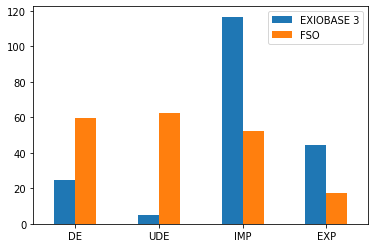

In [12]:
# -- Create a unique dataframe and plot it

FSO = {'DE': 59.8, 'UDE':62.3, 'IMP':52.5, 'EXP':17.5}
dict_res = {k:[exiobase3_res[k], FSO[k]] for k in FSO.keys()}

results = pd.DataFrame.from_dict(dict_res, orient='index',
                                 columns=['EXIOBASE 3', 'FSO'])

ax = results.plot.bar(rot=0)

In [13]:
results

,EXIOBASE 3,FSO
DE,24.455998,59.8
UDE,4.680002,62.3
IMP,116.620892,52.5
EXP,44.394499,17.5


#### 3. Update to system for a new final demand

In [14]:
# show the original final demand vector
exio3.Y.loc['CH','CH'] 

category,Final consumption expenditure by households,Final consumption expenditure by non-profit organisations serving households (NPISH),Final consumption expenditure by government,Gross fixed capital formation,Changes in inventories,Changes in valuables,Exports: Total (fob)
sector,,,,,,,
Cultivation of paddy rice,0.000000,0.000000,0.000000,0.000000,0,0,0
Cultivation of wheat,0.135387,0.170160,0.399943,0.041869,0,0,0
Cultivation of cereal grains nec,0.082040,0.103110,0.242348,0.025371,0,0,0
"Cultivation of vegetables, fruit, nuts",1647.444218,0.778210,1.829097,262.349929,0,0,0
Cultivation of oil seeds,3.771267,0.036817,0.086527,0.009059,0,0,0
...,...,...,...,...,...,...,...
Activities of membership organisation n.e.c. (91),41.927096,8397.737844,576.657853,1.505580,0,0,0
"Recreational, cultural and sporting activities (92)",2125.956019,9085.520116,1352.229462,5.197082,0,0,0
Other service activities (93),3954.693971,3.765660,81.906351,4.862900,0,0,0


In [15]:
# rescaling factor basd on population
# western Switzerland: population 2.1 million; whole Switzerland: population 8.7 million 
pop_ratio = 2.1 / 8.7

# Copy the final demand into a new final demoand vector
Y_new = exio3.Y.copy()

# show the targeted elements of Y
list_cols = ['Final consumption expenditure by households',
             'Final consumption expenditure by non-profit organisations serving households (NPISH)',
             'Final consumption expenditure by government',
             'Gross fixed capital formation',
            ]

# shows the components to be changed of the final demand vector
Y_new.loc['CH',('CH',list_cols)] 

region                                                                                      CH  \
category                                           Final consumption expenditure by households   
sector                                                                                           
Cultivation of paddy rice                                                             0.000000   
Cultivation of wheat                                                                  0.135387   
Cultivation of cereal grains nec                                                      0.082040   
Cultivation of vegetables, fruit, nuts                                             1647.444218   
Cultivation of oil seeds                                                              3.771267   
...                                                                                        ...   
Activities of membership organisation n.e.c. (91)                                    41.927096   
Recreational, cultural and sporting activities ...                                 2125.956019   
Other service activities (93)                                                      3954.693971   
Private households with employed persons (95)                                       387.432362   
Extra-territorial organizations and bodies                                            0.000000   

region                                                                                                                                   \
category                                           Final consumption expenditure by non-profit organisations serving households (NPISH)   
sector                                                                                                                                    
Cultivation of paddy rice                                                                    0.000000                                     
Cultivation of wheat                                                                         0.170160                                     
Cultivation of cereal grains nec                                                             0.103110                                     
Cultivation of vegetables, fruit, nuts                                                       0.778210                                     
Cultivation of oil seeds                                                                     0.036817                                     
...                                                                                               ...                                     
Activities of membership organisation n.e.c. (91)                                         8397.737844                                     
Recreational, cultural and sporting activities ...                                        9085.520116                                     
Other service activities (93)                                                                3.765660                                     
Private households with employed persons (95)                                                0.717421                                     
Extra-territorial organizations and bodies                                                   0.000000                                     

region                                                                                          \
category                                           Final consumption expenditure by government   
sector                                                                                           
Cultivation of paddy rice                                                             0.000000   
Cultivation of wheat                                                                  0.399943   
Cultivation of cereal grains nec                                                      0.242348   
Cultivation of vegetables, fruit, nuts                                                1.8290

In [16]:
# Update Y to consider only for wester Switzerland  
Y_new.loc['CH',('CH',list_cols)] = (Y_new.loc['CH',('CH',list_cols)] * pop_ratio).values
Y_new.loc['CH',('CH',list_cols)] 

region                                                                                      CH  \
category                                           Final consumption expenditure by households   
sector                                                                                           
Cultivation of paddy rice                                                             0.000000   
Cultivation of wheat                                                                  0.032680   
Cultivation of cereal grains nec                                                      0.019803   
Cultivation of vegetables, fruit, nuts                                              397.658949   
Cultivation of oil seeds                                                              0.910306   
...                                                                                        ...   
Activities of membership organisation n.e.c. (91)                                    10.120333   
Recreational, cultural and sporting activities ...                                  513.161798   
Other service activities (93)                                                       954.581303   
Private households with employed persons (95)                                        93.518156   
Extra-territorial organizations and bodies                                            0.000000   

region                                                                                                                                   \
category                                           Final consumption expenditure by non-profit organisations serving households (NPISH)   
sector                                                                                                                                    
Cultivation of paddy rice                                                                    0.000000                                     
Cultivation of wheat                                                                         0.041073                                     
Cultivation of cereal grains nec                                                             0.024889                                     
Cultivation of vegetables, fruit, nuts                                                       0.187844                                     
Cultivation of oil seeds                                                                     0.008887                                     
...                                                                                               ...                                     
Activities of membership organisation n.e.c. (91)                                         2027.040169                                     
Recreational, cultural and sporting activities ...                                        2193.056580                                     
Other service activities (93)                                                                0.908952                                     
Private households with employed persons (95)                                                0.173171                                     
Extra-territorial organizations and bodies                                                   0.000000                                     

region                                                                                          \
category                                           Final consumption expenditure by government   
sector                                                                                           
Cultivation of paddy rice                                                             0.000000   
Cultivation of wheat                                                                  0.096538   
Cultivation of cereal grains nec                                                      0.058498   
Cultivation of vegetables, fruit, nuts                                                0.4415

In [17]:
# -- Create a new exio3 object and run the calculations with the diagonalized the stressors

#  copy the original IOSystem
exio3_new = exio3.copy()

# assign the new final demand 
exio3_new.Y = Y_new

exiobase3_new_res = {k:0 for k in ['DE','UDE','IMP','EXP']}

for i in ['Material Used', 'Material Unused']:
    res_diag   = exio3.satellite_agg.diag_stressor((i), name = 'res_diag')

    # set the stressor diagonal
    exio3_new.res_diag = res_diag
    # perform all the calculation (it takes around 2/3 minutes)
    exio3_new.calc_all()
    
    # save the results for the given final demand vector Y
    # total requirements 
    exio3_new.res_diag.D_cba.to_csv(i + '_new_D_cba.csv') 
    # imported
    exio3_new.res_diag.D_imp.to_csv(i + '_new_D_imp.csv')
    # exported
    exio3_new.res_diag.D_exp.to_csv(i + '_new_D_exp.csv')
    
    # store results for comparison with FSO estimations
    if i == 'Material Used':
        exiobase3_new_res['DE'] = exio3_new.res_diag.D_cba_reg.CH.CH.sum() / 1000
        exiobase3_new_res['IMP'] += exio3_new.res_diag.D_imp_reg.CH.sum() / 1000
        exiobase3_new_res['EXP'] += exio3_new.res_diag.D_exp_reg.CH.sum() / 1000
    else:
        exiobase3_new_res['UDE'] = exio3_new.res_diag.D_cba_reg.CH.CH.sum() / 1000
    


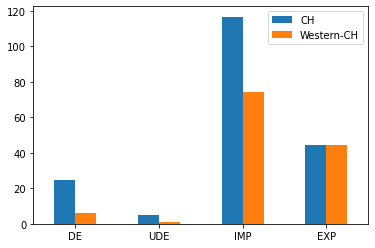

In [18]:
# -- Plot the results

dict_res = {k:[exiobase3_res[k], exiobase3_new_res[k]] for k in exiobase3_new_res.keys()}

results = pd.DataFrame.from_dict(dict_res, orient='index',
                                 columns=['CH', 'Western-CH'])

ax = results.plot.bar(rot=0)